In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib.pyplot as plt

In [2]:

import tensorflow as tf
from tensorflow import keras

In [3]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
%matplotlib inline

In [5]:
from keras.preprocessing.image import ImageDataGenerator

In [6]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
ShipData = ImageDataGenerator(rescale = 1/255,validation_split=0.2)

ShipTrain = ShipData.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Automating_Port_Operations_dataset',
                                               class_mode='categorical',
                                               classes = ['buoy','cruise_ship','ferry_boat', 'freight_boat','gondola','inflatable_boat','kayak','paper_boat','sailboat'],
                                                 )

Found 1161 images belonging to 9 classes.


In [8]:

print(np.dtype(ShipTrain))

float32


<ipython-input-8-996c95780df7>:1: DeprecationWarning: in the future the `.dtype` attribute of a given datatype object must be a valid dtype instance. `data_type.dtype` may need to be coerced using `np.dtype(data_type.dtype)`. (Deprecated NumPy 1.20)
  print(np.dtype(ShipTrain))


In [9]:
#train_data_set,test_data=ShipData.random_split(train_data_set = 0.8,random_state=43)

In [10]:
#Batch size = given to neural network in first instance
#target_size = to convert images to a size

ship_train_dataset = ShipData.flow_from_directory(batch_size=3,
                                                 directory='/content/drive/MyDrive/Colab Notebooks/Automating_Port_Operations_dataset',
                                                 shuffle=True,
                                                 target_size=(200, 200),
                                                 subset="training",
                                                 class_mode='categorical')
# target size reahapes image size

ship_validation_dataset = ShipData.flow_from_directory(batch_size=3,
                                                 directory='/content/drive/MyDrive/Colab Notebooks/Automating_Port_Operations_dataset',
                                                 shuffle=True,
                                                 target_size=(200, 200),
                                                 subset="validation",
                                                 class_mode='categorical')

Found 933 images belonging to 9 classes.
Found 228 images belonging to 9 classes.


In [11]:
#ship_train_dataset.classes

In [12]:
#ship_train_dataset.class_indices

In [13]:
ShipTypes = ['buoy','cruise_ship','ferry_boat', 'freight_boat','gondola','inflatable_boat','kayak','paper_boat','sailboat']
ShipCat = np.array(ShipTypes)


In [14]:
type(ShipCat)

numpy.ndarray

In [15]:
ShipCat

array(['buoy', 'cruise_ship', 'ferry_boat', 'freight_boat', 'gondola',
       'inflatable_boat', 'kayak', 'paper_boat', 'sailboat'], dtype='<U15')

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(ShipCat)

LabelEncoder()

In [17]:
from keras.utils import to_categorical

In [18]:
ShipCat_int=le.transform(ShipCat)

In [19]:
print(ShipCat_int)

[0 1 2 3 4 5 6 7 8]


In [20]:
ShipCat = to_categorical(ShipCat_int, 10)

In [21]:
ShipCat

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [22]:
#from keras.utils import to_categorical
#ShipCat = to_categorical(ShipCat, 10)

In [23]:
print(len(ship_train_dataset))

311


In [24]:
#idx = random.random(0,len(ship_train_dataset))
#plt.imshow(ship_train_dataset[idx,:])
#plt.show

In [25]:
print(type(ship_train_dataset[0]))

<class 'tuple'>


In [26]:
print(type(ship_validation_dataset))

<class 'keras.preprocessing.image.DirectoryIterator'>


In [27]:
print(dir(ship_train_dataset))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__next__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_filepaths', '_flow_index', '_get_batches_of_transformed_samples', '_keras_api_names', '_keras_api_names_v1', '_set_index_array', 'allowed_class_modes', 'batch_index', 'batch_size', 'class_indices', 'class_mode', 'classes', 'color_mode', 'data_format', 'directory', 'dtype', 'filenames', 'filepaths', 'image_data_generator', 'image_shape', 'index_array', 'index_generator', 'interpolation', 'keep_aspect_ratio', 'labels', 'lock', 'n', 'next', 'num_classes', 'on_epoch_end', 'reset', 'sample_weight', 'samples', 'save_format', 'save_prefix', 'save_to_dir', 'seed', 'set_processing_attrs', 'shuffle', 'spli

In [28]:
print(len(ship_train_dataset))

311


In [29]:
print(np.dtype(ship_train_dataset))

float32


<ipython-input-29-c3c7138edb02>:1: DeprecationWarning: in the future the `.dtype` attribute of a given datatype object must be a valid dtype instance. `data_type.dtype` may need to be coerced using `np.dtype(data_type.dtype)`. (Deprecated NumPy 1.20)
  print(np.dtype(ship_train_dataset))


In [30]:
print(len(ship_validation_dataset))

76


In [31]:
#ship_train_data_array = np.array(ship_train_dataset[0][0])
#Converts 1st element to NumPy array
# it is a 4-dimnesional array

In [32]:
#ship_train_data_array.size

In [33]:
#ship_train_data_array.ndim

In [34]:
#print(ship_train_data_array.shape)
#ship_train_data_array contains only 1st element of ship_train _data

In [35]:
#ship_train_data_array_new = ship_train_data_array.reshape(600,600)

In [36]:
#ship_train_data_array_new.shape

In [37]:
#ship_train_data_array_new.size

In [38]:
#print(ship_train_data_array.shape)

In [39]:
#ship_train_dataset[0] #this command is working. It shows dtype as float 32

In [40]:
class_names = ['ferry_boat', 'gondola', 'sailboat', 'kayak', 'inflatable_boat', 'paper_boat', 'buoy', 'freight_boat', 'cruise_ship']

In [41]:
print(f"ShipTrainDataset shape: {ship_train_dataset.dtype}")

ShipTrainDataset shape: float32


In [42]:
#plt.figure(figsize=[10,10])
#for i in range (25):    # for first 25 images
  #plt.subplot(5, 5, i+1)
  #plt.xticks([])
  #plt.yticks([])
  #plt.grid(False)
  #plt.imshow(ship_train_dataset[i], cmap=plt.cm.binary)
  #plt.xlabel(class_names[y_train[i][0]])

#plt.show()

In [43]:
ship_train_dataset.class_indices

{'buoy': 0,
 'cruise_ship': 1,
 'ferry_boat': 2,
 'freight_boat': 3,
 'gondola': 4,
 'inflatable_boat': 5,
 'kayak': 6,
 'paper_boat': 7,
 'sailboat': 8}

In [44]:
#ship_train_dataset=pd.DataFrame(ship_train_dataset)
#ship_train_dataset.shape()

#ship_train_dataset=ship_train_dataset.astype('float32')
#ship_validation_dataset=ship_validation_dataset.astype('float32')

#ship_train_dataset=np.array(ship_train_dataset)
#ship_validation_dataset=np.array(ship_validation_dataset)

#ship_train_dataset=ship_train_dataset.astype('float32')
#ship_validation_dataset=ship_validation_dataset.astype('float32')

#ship_train_dataset.size()



In [45]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.layers import GlobalAveragePooling2D

In [46]:
model = Sequential()


In [47]:
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(200, 200, 3), activation='relu', padding='same')) #input shape same as target size
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(200, 200, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(GlobalAveragePooling2D(input_shape=(10,10,10)))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(9, activation='softmax'))

model.add(Dropout(0.35))
model.add(Flatten())

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 global_average_pooling2d (G  (None, 32)               0         
 lobalAveragePooling2D)                                          
                                                        

In [49]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics= ['accuracy'])

In [50]:
model.fit(ship_train_dataset, epochs = 20,validation_data = ship_validation_dataset)

Epoch 1/20
311/311 [==============================] - 335s 1s/step - loss: 6.7402 - accuracy: 0.2487 - val_loss: 1.7897 - val_accuracy: 0.3377
Epoch 2/20
311/311 [==============================] - 69s 223ms/step - loss: 6.6591 - accuracy: 0.2626 - val_loss: 1.8595 - val_accuracy: 0.3509
Epoch 3/20
311/311 [==============================] - 67s 214ms/step - loss: 6.8236 - accuracy: 0.2562 - val_loss: 1.7548 - val_accuracy: 0.3991
Epoch 4/20
311/311 [==============================] - 68s 220ms/step - loss: 6.3581 - accuracy: 0.3183 - val_loss: 1.7047 - val_accuracy: 0.4167
Epoch 5/20
311/311 [==============================] - 66s 213ms/step - loss: 6.5685 - accuracy: 0.3108 - val_loss: 1.7717 - val_accuracy: 0.3640
Epoch 6/20
311/311 [==============================] - 68s 220ms/step - loss: 6.9865 - accuracy: 0.2947 - val_loss: 1.6982 - val_accuracy: 0.4123
Epoch 7/20
311/311 [==============================] - 73s 234ms/step - loss: 6.1747 - accuracy: 0.3162 - val_loss: 1.6498 - val_accu

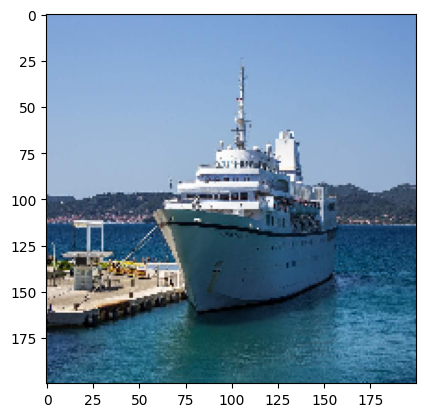

1/1 [==============================] - 0s 154ms/step


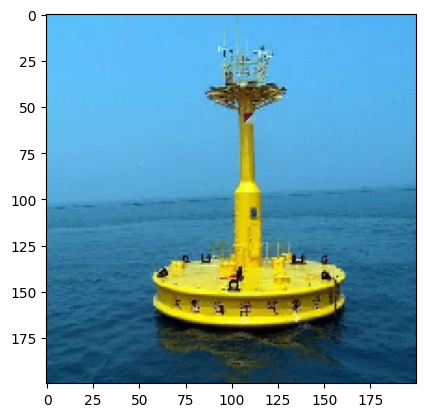

1/1 [==============================] - 0s 38ms/step


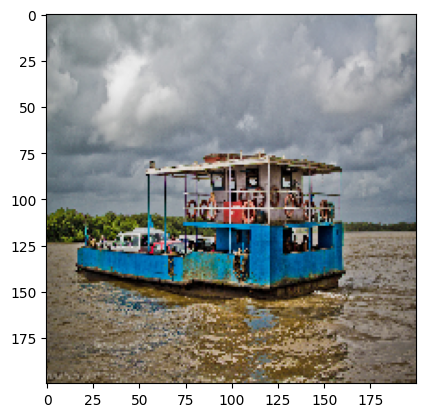

1/1 [==============================] - 0s 66ms/step


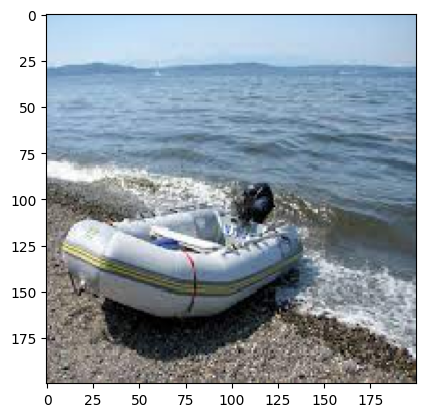

1/1 [==============================] - 0s 63ms/step


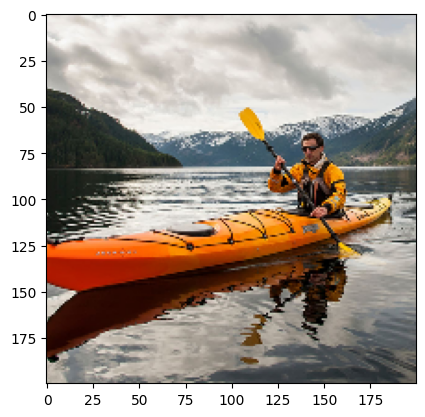

1/1 [==============================] - 0s 74ms/step


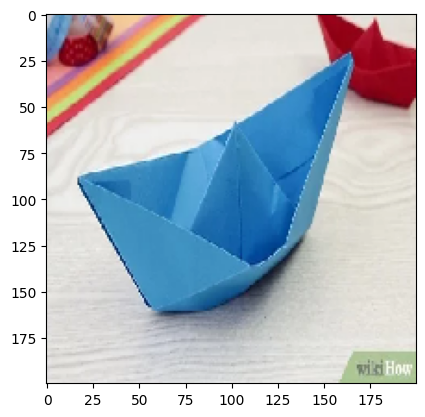

1/1 [==============================] - 0s 65ms/step


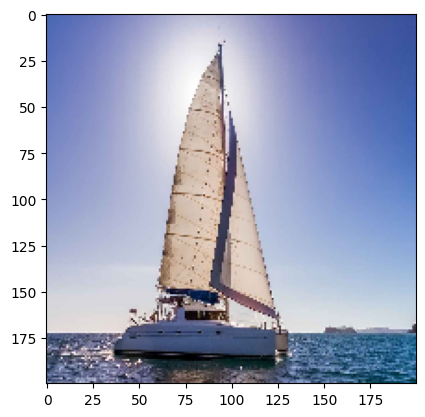

1/1 [==============================] - 0s 49ms/step


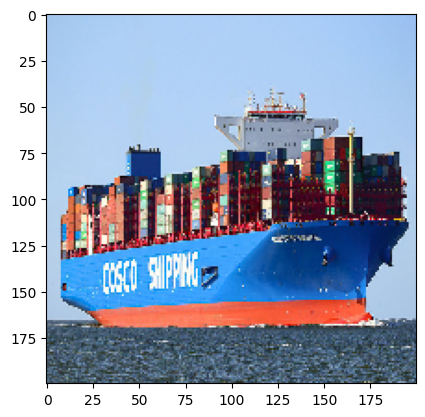

1/1 [==============================] - 0s 44ms/step


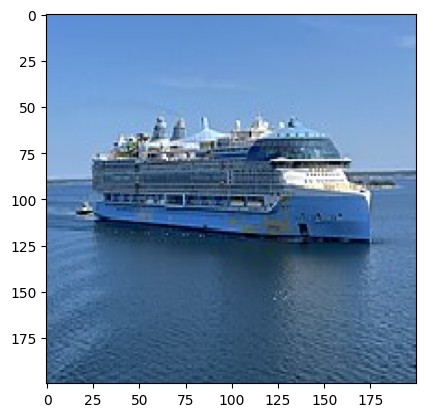

1/1 [==============================] - 0s 44ms/step


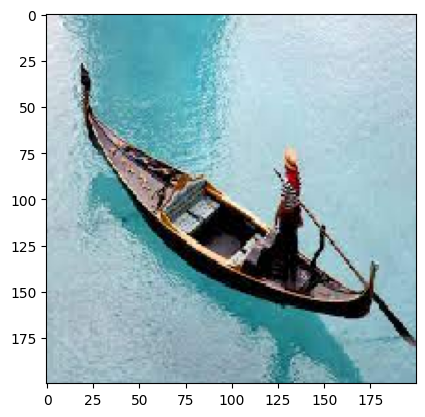

1/1 [==============================] - 0s 43ms/step


In [54]:
dir_path='/content/drive/MyDrive/Colab Notebooks/Test2'
for i in os.listdir(dir_path):
  #print(i)
  img = image.load_img(dir_path+'//' + i,target_size=(200,200))
  plt.imshow(img)
  plt.show()

  X = image.img_to_array(img)
  X = np.expand_dims(X,axis=0)
  images = np.vstack([X])
  val = model.predict(images)
  val


In [52]:
ship_validation_dataset.class_indices

{'buoy': 0,
 'cruise_ship': 1,
 'ferry_boat': 2,
 'freight_boat': 3,
 'gondola': 4,
 'inflatable_boat': 5,
 'kayak': 6,
 'paper_boat': 7,
 'sailboat': 8}

In [53]:
import cv2
import os
from tensorflow.keras.preprocessing import image

In [55]:
#ship_test_dataset = ShipData.flow_from_directory(batch_size=3,
                                                 #directory='/content/drive/MyDrive/Colab Notebooks/Test Ship Images',
                                                 #shuffle=True,
                                                 #target_size=(200, 200),
                                                 #class_mode='categorical')

In [56]:
  #C1 = val == 0
  #C2 = val == 1
  #C3 = val == 2
  #C4 = val == 3
  #C5 = val == 4
  #C6 = val == 5
  #C7 = val == 6
  #C8 = val == 7
  #C9 = val == 8

  #if C1.all():
    #print('buoy')
  #elif C2.all():
    #print('cruise_ship')
  #elif C3.all():
    #print('ferry_boat')
  #elif C4.all():
    #print('freight_boat')
  #elif C5.all():
    #print('gondola')
  #elif C6.all():
    #print('inflatable_boat')
  #elif C7.all():
    #print('kayak')
  #elif C8.all():
    #print('paper_boat')
  #elif C9.all():
    #print('sailboat')


In [57]:
val

array([[0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [58]:
val.dtype

dtype('float32')

In [59]:
val.ndim

2

In [60]:
val.max()

1.0

In [61]:
val.size

9

In [62]:
print(dir(val))

['T', '__abs__', '__add__', '__and__', '__array__', '__array_finalize__', '__array_function__', '__array_interface__', '__array_prepare__', '__array_priority__', '__array_struct__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__class_getitem__', '__complex__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dir__', '__divmod__', '__dlpack__', '__dlpack_device__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__ilshift__', '__imatmul__', '__imod__', '__imul__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__irshift__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lshift__', '__lt__', '__matmul__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '

In [63]:
val.min()

0.0